In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from matplotlib.pyplot import imread
from PIL import Image

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_dir = '/content/drive/My Drive/Sign-language-digits-dataset'

In [0]:
os.listdir(data_dir)

['Y.npy', 'X.npy']

In [0]:
X = np.load(data_dir+'/X.npy')

In [0]:
y = np.load(data_dir+'/Y.npy')

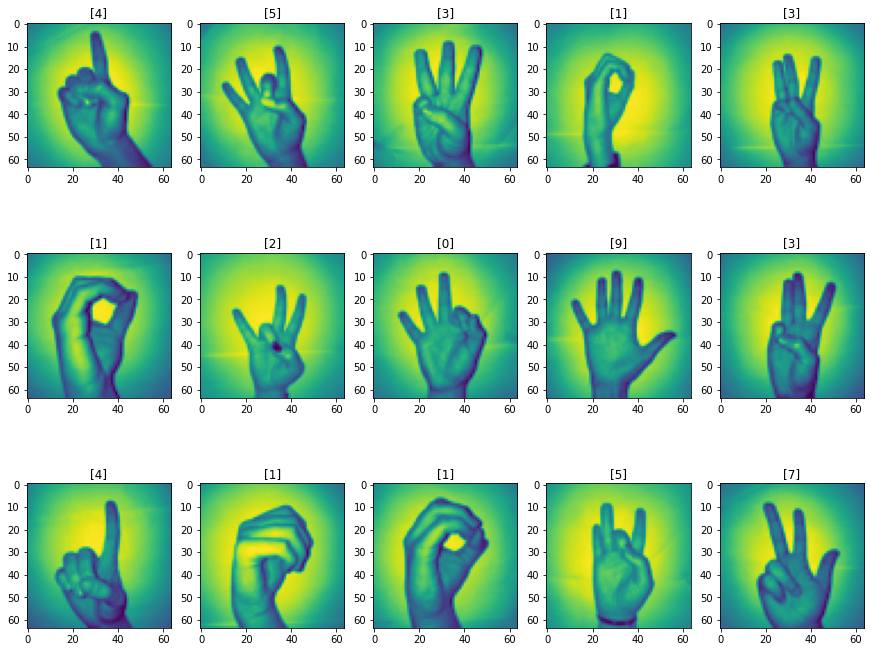

In [0]:
import random
fig, axes = plt.subplots(3,5,figsize=(15,12))
for i, ax in enumerate(axes.flat):
  r = random.randrange(2062)
  ax.imshow(X[r,:,:])
  ax.set_title([x for x,j in enumerate(y[r]) if j==1])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
from tensorflow.keras.optimizers import Adam
op = Adam(lr=0.001)

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2304)             

In [0]:
X_train = X_train.reshape(-1,64,64,1)
X_test = X_test.reshape(-1,64,64,1)

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [0]:
model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/30
52/52 [==============================] - 7s 138ms/step - loss: 2.1990 - accuracy: 0.2032 - val_loss: 1.6956 - val_accuracy: 0.4431
Epoch 2/30
52/52 [==============================] - 7s 135ms/step - loss: 1.1814 - accuracy: 0.5876 - val_loss: 0.7862 - val_accuracy: 0.7554
Epoch 3/30
52/52 [==============================] - 7s 133ms/step - loss: 0.7199 - accuracy: 0.7538 - val_loss: 0.5876 - val_accuracy: 0.8354
Epoch 4/30
52/52 [==============================] - 7s 134ms/step - loss: 0.5435 - accuracy: 0.8344 - val_loss: 0.4880 - val_accuracy: 0.8547
Epoch 5/30
52/52 [==============================] - 7s 133ms/step - loss: 0.4024 - accuracy: 0.8781 - val_loss: 0.4186 - val_accuracy: 0.8668
Epoch 6/30
52/52 [==============================] - 7s 134ms/step - loss: 0.2985 - accuracy: 0.9066 - val_loss: 0.3511 - val_accuracy: 0.8862
Epoch 7/30
52/52 [==============================] - 7s 133ms/step - loss: 0.2574 - accuracy: 0.9181 - val_loss: 0.3006 - val_accuracy: 0.9056
Epoch 

In [0]:
losses = pd.DataFrame(model.history.history)

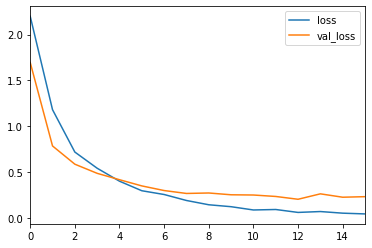

In [0]:
losses[['loss','val_loss']].plot()

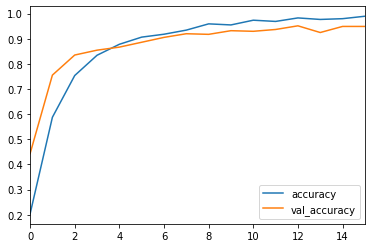

In [0]:
losses[['accuracy','val_accuracy']].plot()

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
y_true = np.argmax(y_test,axis=1)

In [0]:
y_true

array([4, 7, 5, 4, 7, 7, 9, 7, 6, 1, 2, 2, 9, 9, 1, 9, 4, 6, 3, 5, 6, 9,
       1, 5, 1, 5, 8, 9, 7, 5, 0, 3, 4, 9, 4, 5, 1, 5, 7, 9, 0, 9, 4, 1,
       7, 1, 8, 7, 0, 4, 4, 8, 4, 9, 0, 6, 0, 0, 8, 4, 5, 5, 7, 6, 5, 7,
       0, 2, 8, 6, 3, 9, 8, 4, 0, 1, 1, 8, 6, 3, 8, 4, 4, 5, 2, 7, 1, 7,
       2, 1, 4, 4, 5, 9, 9, 7, 1, 7, 7, 9, 4, 1, 5, 3, 9, 7, 5, 6, 5, 5,
       8, 1, 8, 0, 2, 8, 9, 9, 0, 1, 4, 2, 2, 6, 2, 8, 7, 5, 6, 0, 6, 3,
       0, 5, 3, 9, 4, 7, 0, 8, 2, 1, 5, 0, 6, 6, 0, 1, 8, 0, 3, 7, 7, 7,
       4, 0, 9, 4, 5, 5, 7, 9, 9, 0, 8, 2, 5, 0, 9, 7, 8, 1, 7, 2, 1, 4,
       3, 0, 8, 3, 0, 2, 3, 0, 4, 5, 7, 9, 9, 8, 5, 7, 1, 0, 0, 6, 2, 5,
       6, 9, 1, 9, 4, 5, 8, 7, 6, 4, 6, 0, 6, 1, 1, 2, 3, 6, 4, 5, 6, 7,
       8, 9, 2, 2, 5, 4, 3, 4, 7, 6, 3, 0, 4, 1, 5, 7, 1, 4, 9, 5, 0, 2,
       3, 6, 7, 0, 8, 3, 3, 6, 8, 6, 8, 1, 4, 8, 4, 8, 3, 8, 9, 7, 6, 4,
       9, 5, 3, 2, 4, 9, 7, 3, 0, 5, 3, 5, 2, 1, 0, 9, 3, 0, 7, 6, 7, 3,
       3, 5, 9, 5, 5, 3, 3, 2, 4, 7, 8, 6, 9, 3, 8,

In [0]:
print(classification_report(y_true,pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       1.00      0.97      0.99        40
           2       0.81      0.93      0.87        28
           3       0.98      0.95      0.96        43
           4       0.91      1.00      0.95        48
           5       0.96      0.88      0.91        49
           6       0.95      0.92      0.93        38
           7       1.00      0.95      0.98        44
           8       1.00      0.89      0.94        38
           9       0.98      1.00      0.99        45

    accuracy                           0.95       413
   macro avg       0.95      0.95      0.95       413
weighted avg       0.95      0.95      0.95       413



Text(87.0, 0.5, 'predictions')

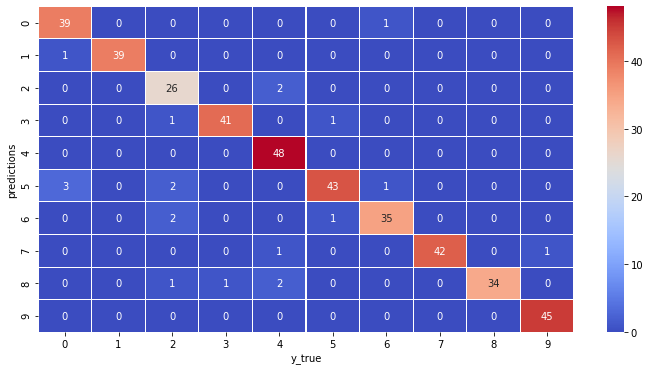

In [0]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_true,pred),cmap='coolwarm',annot=True,linecolor='white',lw=0.1)
plt.xlabel('y_true')
plt.ylabel('predictions')